
 - - - epsilon = 1 - - -
Minimizer:  [-0.41421356 -0.61803399 -0.72075922 -0.78077641 -0.8198039  -0.84712709
 -0.8672954  -0.88278222 -0.89504279 -0.90498756]
Optimal objective:  -35.403225519724245
Number of Newton iterations:  11

 - - - epsilon = 0.1 - - -
Minimizer:  [-0.90498756 -0.95124922 -0.96722207 -0.97531245 -0.98019998 -0.98347221
 -0.98581632 -0.98757812 -0.98895062 -0.99005   ]
Optimal objective:  -508.6548096579975
Number of Newton iterations:  17

 - - - epsilon = 0.01 - - -
Minimizer:  [-0.99005    -0.9950125  -0.99667222 -0.99750312 -0.998002   -0.99833472
 -0.99857245 -0.99875078 -0.99888951 -0.9990005 ]
Optimal objective:  -5435.760712581269
Number of Newton iterations:  23

 - - - epsilon = 0.005 - - -
Minimizer:  [-0.9950125  -0.99750312 -0.99833472 -0.99875078 -0.9990005  -0.99916701
 -0.99928597 -0.9993752  -0.9994446  -0.99950012]
Optimal objective:  -10928.836563152645
Number of Newton iterations:  25


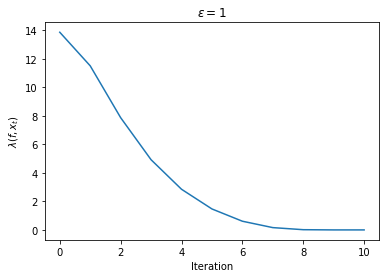

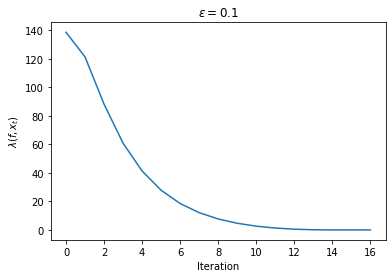

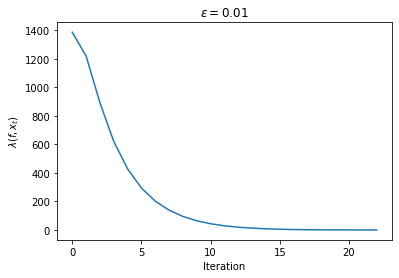

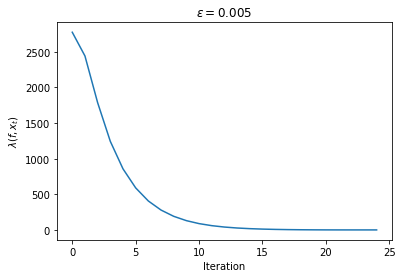

In [1]:
import numpy as np
import matplotlib.pyplot as plt

tol = 10e-6
n = 10
N = range(n)

class instance():

    def __init__(self, eps):
        self.eps = eps
        self.x = np.zeros((n))
        self.M = 1
        self.lam_hist = []

    def __call__(self, *args, **kwargs):
        while not self.step():
            continue
        return self.x

    def compute_grad(self):
        grad = np.zeros((n))
        for i in N:
            grad[i] = (i+1)/self.eps + 2*self.x[i]/(1-self.x[i]**2)
        self.grad = grad

    def compute_hess(self):
        hessian = np.zeros((n,n))
        for i in N:
            hessian[i,i] = 2*(1+self.x[i]**2)/(1-self.x[i]**2)**2
        self.hessian = hessian

    def compute_lambda(self):
        self.lam = np.sqrt(self.grad.T @ np.linalg.inv(self.hessian) @ self.grad)
        self.lam_hist.append(self.lam)

    def check_cond(self):
        return self.lam <= tol

    def step(self):
        self.compute_grad()
        self.compute_hess()
        self.compute_lambda()
        if self.check_cond():
            return True
        self.x = self.x - 1/(1+self.M*self.lam)*(np.linalg.inv(self.hessian)@self.grad)
        return False

    def f(self, x):
        res = 0
        for i in N:
            res += (i+1)/self.eps*x[i] - np.log(1-x[i]**2)
        return res

if __name__ == '__main__':
    eps_opt = [1, 0.1, 0.01, 0.005]
    for eps in eps_opt:
        problem = instance(eps)
        x_sol = problem()
        num_iter = len(problem.lam_hist)

        print("\n - - - epsilon = " + str(eps) + " - - -")
        print("Minimizer: ", x_sol)
        print("Optimal objective: ", problem.f(x_sol))
        print("Number of Newton iterations: ", num_iter)

        plt.clf()
        plt.title(r'$\varepsilon = $'+str(eps))
        plt.plot(problem.lam_hist)
        plt.xlabel("Iteration")
        plt.ylabel(r'$\lambda(f, x_t)$')
        plt.show()

